In [1]:
import pandas as pd
import numpy as pn
import requests
import json

In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns 
from seaborn import kdeplot
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
import nbconvert as nb
import nbformat

In [3]:
url="https://covid.ourworldindata.org/data/owid-covid-data.csv" # @Elsa TH
data = pd.read_csv(url, date_parser="date")
data

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37189,NaN,NaN,International,2020-02-28,705.0,0.0,4.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37190,NaN,NaN,International,2020-02-29,705.0,0.0,6.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37191,NaN,NaN,International,2020-03-01,705.0,0.0,6.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37192,NaN,NaN,International,2020-03-02,705.0,0.0,6.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy'],
      dtype='object')

In [4]:
data2 = data.loc[:,["location","date", "total_deaths", "total_cases" ]].dropna()
data2

,location,date,total_deaths,total_cases
0,Afghanistan,2019-12-31,0.0,0.0
1,Afghanistan,2020-01-01,0.0,0.0
2,Afghanistan,2020-01-02,0.0,0.0
3,Afghanistan,2020-01-03,0.0,0.0
4,Afghanistan,2020-01-04,0.0,0.0
...,...,...,...,...
37189,International,2020-02-28,4.0,705.0
37190,International,2020-02-29,6.0,705.0
37191,International,2020-03-01,6.0,705.0
37192,International,2020-03-02,6.0,705.0


In [5]:
data2["recuperation"] = data2.total_cases - data2.total_deaths
data2

,location,date,total_deaths,total_cases,recuperation
0,Afghanistan,2019-12-31,0.0,0.0,0.0
1,Afghanistan,2020-01-01,0.0,0.0,0.0
2,Afghanistan,2020-01-02,0.0,0.0,0.0
3,Afghanistan,2020-01-03,0.0,0.0,0.0
4,Afghanistan,2020-01-04,0.0,0.0,0.0
...,...,...,...,...,...
37189,International,2020-02-28,4.0,705.0,701.0
37190,International,2020-02-29,6.0,705.0,699.0
37191,International,2020-03-01,6.0,705.0,699.0
37192,International,2020-03-02,6.0,705.0,699.0


In [6]:
data2.set_index(["location"],inplace=True)
data2

,date,total_deaths,total_cases,recuperation
location,,,,
Afghanistan,2019-12-31,0.0,0.0,0.0
Afghanistan,2020-01-01,0.0,0.0,0.0
Afghanistan,2020-01-02,0.0,0.0,0.0
Afghanistan,2020-01-03,0.0,0.0,0.0
Afghanistan,2020-01-04,0.0,0.0,0.0
...,...,...,...,...
International,2020-02-28,4.0,705.0,701.0
International,2020-02-29,6.0,705.0,699.0
International,2020-03-01,6.0,705.0,699.0


In [7]:
data2 = data2.loc[["Argentina", "Spain", "Chile", "Russia", "Colombia"],:]
data2

,date,total_deaths,total_cases,recuperation
location,,,,
Argentina,2020-03-04,0.0,1.0,1.0
Argentina,2020-03-06,0.0,2.0,2.0
Argentina,2020-03-07,0.0,8.0,8.0
Argentina,2020-03-08,1.0,9.0,8.0
Argentina,2020-03-09,1.0,12.0,11.0
...,...,...,...,...
Colombia,2020-08-12,13475.0,410453.0,396978.0
Colombia,2020-08-13,13837.0,422519.0,408682.0
Colombia,2020-08-14,14145.0,433805.0,419660.0


In [ ]:
#################

OBTENGO LOS DATOS POR PAIS:

SPAIN:

In [8]:
spain = data2.loc["Spain",:]
spain.reset_index(inplace=True)
spain.set_index("date",inplace=True)

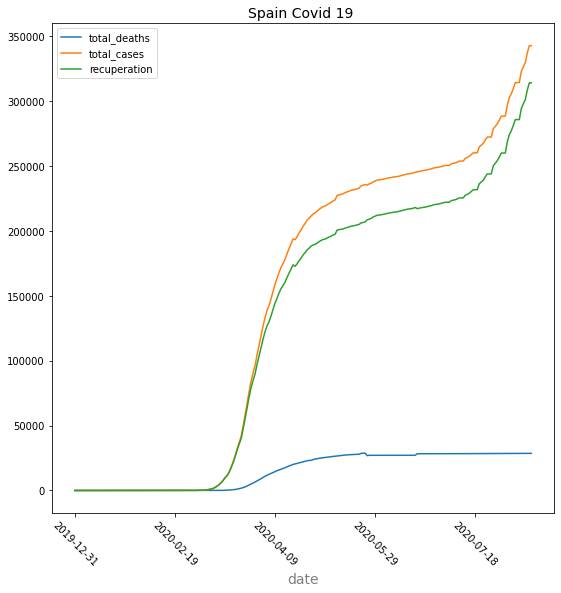

In [9]:
spain.plot(figsize=(9,9), rot=-45)
plt.xlabel("date", size=14, color="grey")
plt.title("Spain Covid 19 ", size=14)
plt.savefig('spain_total_deaths_cases_recuperation.png')


ARGENTINA:

In [10]:
argentina = data2.loc["Argentina",:]
argentina.reset_index(inplace=True)
argentina.set_index("date",inplace=True)

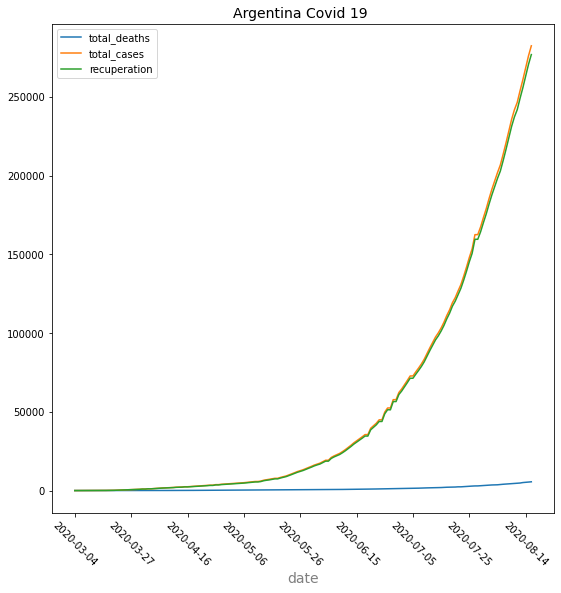

In [11]:
argentina.plot(figsize=(9,9), rot=-45)
plt.xlabel("date", size=14, color="grey")
plt.title("Argentina Covid 19 ", size=14)
plt.savefig('argentina_total_deaths_cases_recuperation.png')

COLOMBIA:

In [12]:
colombia = data2.loc["Colombia",:]
colombia.reset_index(inplace=True)
colombia.set_index("date",inplace=True)


Text(0.5, 1.0, 'Argentina Covid 19 ')

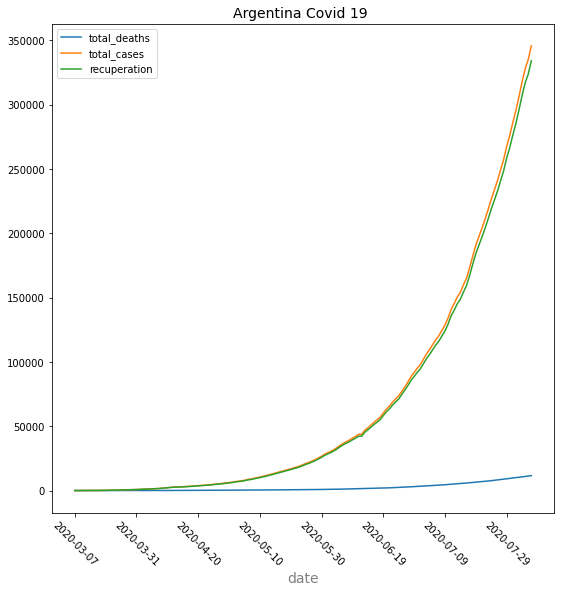

In [147]:
colombia.plot(figsize=(9,9), rot=-45)
plt.xlabel("date", size=14, color="grey")
plt.title("Argentina Covid 19 ", size=14)

RUSIA:

In [13]:
rusia = data2.loc["Russia",:]
rusia.reset_index(inplace=True)
rusia.set_index("date",inplace=True)

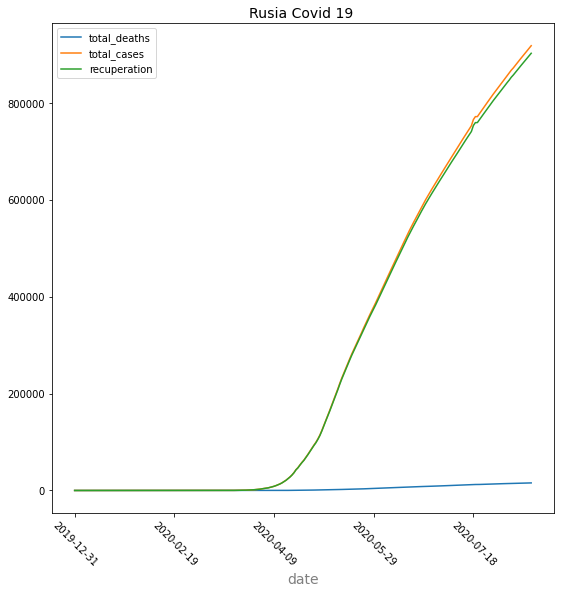

In [14]:
rusia.plot(figsize=(9,9), rot=-45)
plt.xlabel("date", size=14, color="grey")
plt.title("Rusia Covid 19 ", size=14)
plt.savefig('rusia_total_deaths_cases_recuperation.png')

CHILE:

In [15]:
chile = data2.loc["Chile",:]
chile.reset_index(inplace=True)
chile.set_index("date",inplace=True)

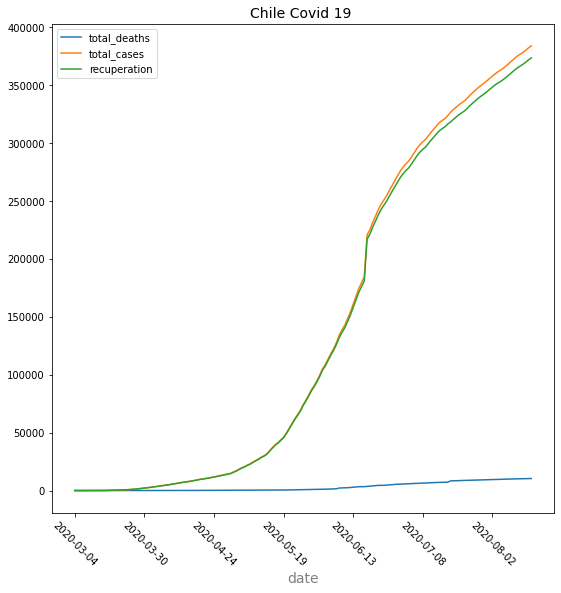

In [16]:
chile.plot(figsize=(9,9), rot=-45)
plt.xlabel("date", size=14, color="grey")
plt.title("Chile Covid 19 ", size=14)
plt.savefig('chile_total_deaths_cases_recuperation.png')


In [ ]:
##################

In [ ]:
OBTENGO LOS DATOS PARA TOTAL_DEATHS, NEW _CASES, RECUPERATION:

In [17]:
data2.reset_index(inplace=True)
data2.set_index("date", inplace=True)


In [18]:
Spain = data2[data2.location == 'Spain']
Argentina = data2[data2.location == 'Argentina']
Rusia = data2[data2.location == 'Russia']
Colombia = data2[data2.location == 'Colombia']
Chile = data2[data2.location == 'Chile']

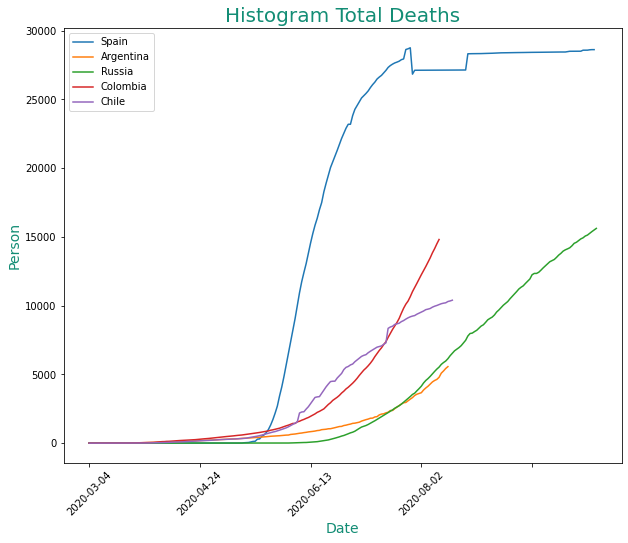

In [19]:
plt.figure(figsize=(10, 8))
Spain.total_deaths.plot(kind="line",label='Spain')
Argentina.total_deaths.plot(kind="line",label='Argentina')
Rusia.total_deaths.plot(kind="line",label='Russia')
Colombia.total_deaths.plot(kind="line",label='Colombia')
Chile.total_deaths.plot(kind="line",label='Chile')
plt.legend(loc='top_right')
plt.title('Histogram Total Deaths', size=20, color="#138D75")
plt.xlabel('Date', size=14, color="#138D75")
plt.ylabel('Person',size=14, color="#138D75")
plt.xticks(rotation=45)
plt.savefig('total_deaths.png')
plt.show()

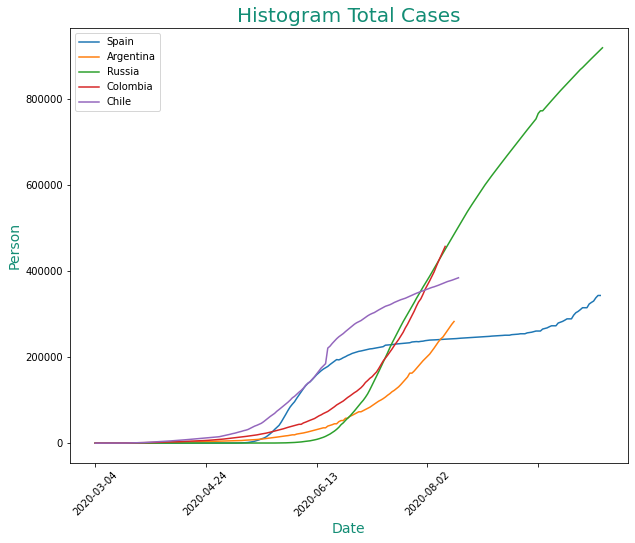

In [21]:
plt.figure(figsize=(10, 8))
Spain.total_cases.plot(kind="line",label='Spain')
Argentina.total_cases.plot(kind="line",label='Argentina')
Rusia.total_cases.plot(kind="line",label='Russia')
Colombia.total_cases.plot(kind="line",label='Colombia')
Chile.total_cases.plot(kind="line",label='Chile')
plt.legend(loc='top_right')
plt.title('Histogram Total Cases', size=20, color="#138D75")
plt.xlabel('Date', size=14, color="#138D75")
plt.ylabel('Person',size=14, color="#138D75")
plt.xticks(rotation=45)
plt.savefig('total_cases.png')
plt.show()

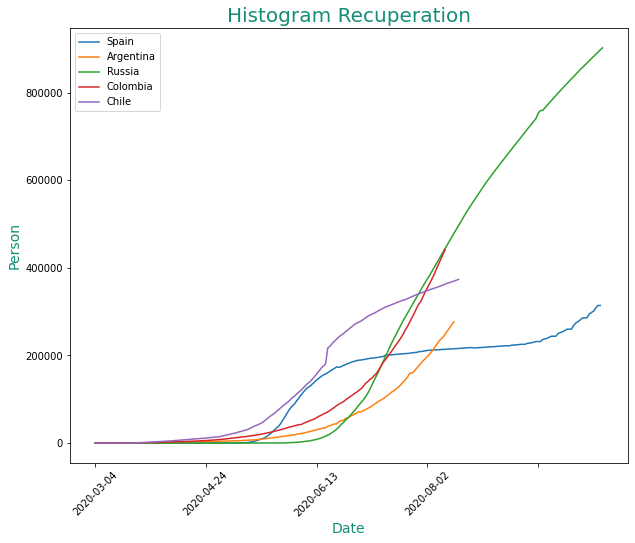

In [20]:
plt.figure(figsize=(10, 8))
Spain.recuperation.plot(kind="line",label='Spain')
Argentina.recuperation.plot(kind="line",label='Argentina')
Rusia.recuperation.plot(kind="line",label='Russia')
Colombia.recuperation.plot(kind="line",label='Colombia')
Chile.recuperation.plot(kind="line",label='Chile')
plt.legend(loc='top_right')
plt.title('Histogram Recuperation', size=20, color="#138D75")
plt.xlabel('Date', size=14, color="#138D75")
plt.ylabel('Person',size=14, color="#138D75")
plt.xticks(rotation=45)
plt.savefig('total_recuperation.png')
plt.show()